## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
king = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [0]:
king_county= king.copy()

In [0]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


We'll start by adding a column of the log of total sqare feet. This transformation will help us with model assumptions.

In [0]:
# answer below:
king_county['log_ft']= np.log(king_county['sqft_living'])

In [0]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
log_ft           21613 non-null float64
dtypes: float64(6), int64(15), object(1)
m

Filter out columns and keeping only: price, bedrooms, bathrooms, log_sqft_living, floors, waterfront

In [0]:
king_county.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_ft'],
      dtype='object')

In [0]:
# answer below:
king_county.drop(['id', 'date', 'sqft_living',
       'sqft_lot', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', ], axis=1, inplace=True)


Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [0]:
# answer below:
king_county.isnull().sum()


price         0
bedrooms      0
bathrooms     0
floors        0
waterfront    0
log_ft        0
dtype: int64

In [0]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
price         21613 non-null float64
bedrooms      21613 non-null int64
bathrooms     21613 non-null float64
floors        21613 non-null float64
waterfront    21613 non-null int64
log_ft        21613 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1013.2 KB


Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [0]:
king_county.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'log_ft'], dtype='object')

In [59]:
# answer below:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Y= king_county['price']

X= king_county[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'log_ft']]

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [60]:
#answer below:
# Assumption two: the error term should be zero on average
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -2.755659956815798e-10


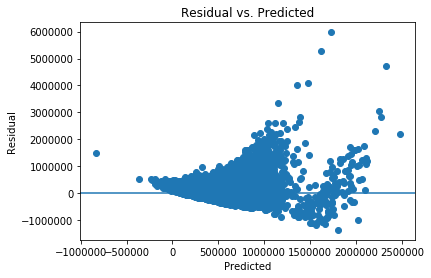

In [61]:
#Assumption three: homoscedasticity
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

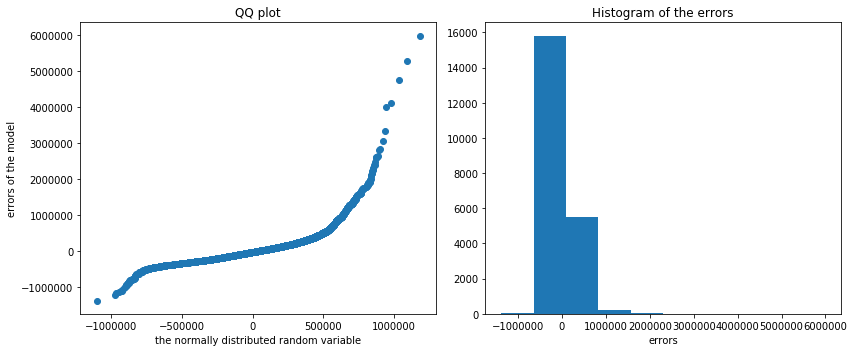

In [62]:
# normal errors 
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [0]:
# errors are not noramlly distributed 

In [63]:
# multicoliniearity 
king_county.corr()

,price,bedrooms,bathrooms,floors,waterfront,log_ft
price,1.000000,0.308350,0.525138,0.256794,0.266369,0.611704
bedrooms,0.308350,1.000000,0.515884,0.175429,-0.006582,0.620864
bathrooms,0.525138,0.515884,1.000000,0.500653,0.063744,0.761304
floors,0.256794,0.175429,0.500653,1.000000,0.023698,0.367569
waterfront,0.266369,-0.006582,0.063744,0.023698,1.000000,0.079306
log_ft,0.611704,0.620864,0.761304,0.367569,0.079306,1.000000


In [0]:
# no multicolinearity over .90%

There are two model assumptions that fail. One way to fix them is to apply a log transformation to price. Create a new train test split where y is the natural log of price and retest the model assumptions.

In [0]:
# answer below
king_2= king_county.copy()

In [0]:
king_2['price_log']= np.log(king_2['price'])

In [73]:
Y= king_2['price_log']

X= king_2[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'log_ft']]

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)

lrm_2 = linear_model.LinearRegression()
lrm_2.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
predictions_2 = lrm_2.predict(X)
errors_2 = Y - predictions_2

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors_2)))

Mean of the errors in the medical costs model is: -7.504702864277836e-16


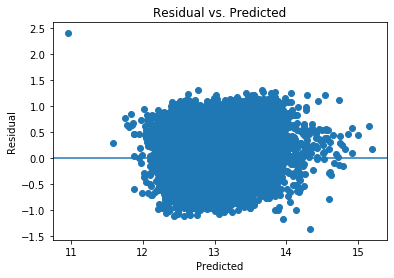

In [75]:
plt.scatter(predictions_2, errors_2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

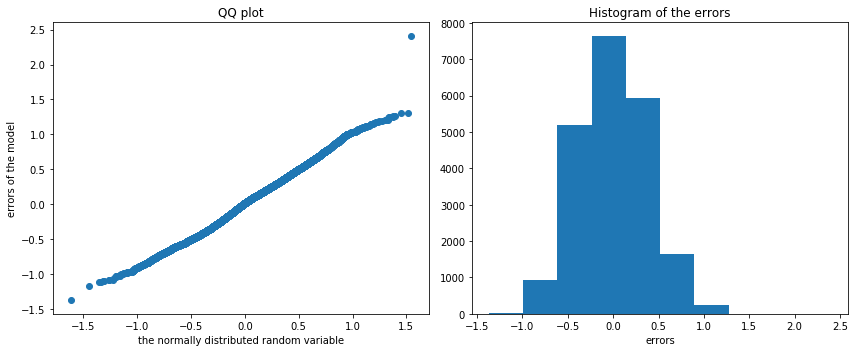

In [76]:
rand_nums = np.random.normal(np.mean(errors_2), np.std(errors_2), len(errors_2))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors_2)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors_2)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [0]:
# much more normal now

Create a linear model and produce a model summary

In [0]:
# answer below
import statsmodels.api as sm



lrm_3 = sm.OLS(Y_train, X_train)
results = lrm_3.fit()


In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.735e+06
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                        0.00
Time:                        20:25:46   Log-Likelihood:                         -11252.
No. Observations:               17290   AIC:                                  2.251e+04
Df Residuals:                   17285   BIC:                                  2.255e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms      -0.1751      0.005    -37.870      0.000      -0.184      -0.166
bathrooms     -0.2928      0.006    -47.469      0.000      -0.305      -0.281
floors         0.0814      0.008     10.785      0.000       0.067       0.096
waterfront     0.4905      0.040     12.238      0.000       0.412       0.569
log_ft         1.8703      0.002    790.293      0.000       1.866       1.875
==============================================================================
Omnibus:                      617.180   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1363.241
Skew:                           0.222   Prob(JB):                    9.46e-297
Kurtosis:                       4.302   Cond. No.                         98.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE

In [86]:
# answer below:
# compute the MAE, MSE, RMSE and MAPE
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

Y_preds_train = lrm_2.predict(X_train)
Y_preds_test = lrm_2.predict(X_test)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds_test) / Y_test)) * 100))


Mean absolute error of the prediction is: 0.30871420304105085
Mean squared error of the prediction is: 0.145663675707184
Root mean squared error of the prediction is: 0.3816591092941239
Mean absolute percentage error of the prediction is: 2.367861975316267


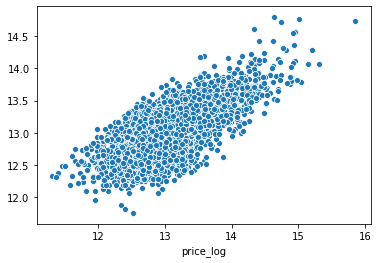

In [91]:
#Plot the true vs. predicted values 
import seaborn as sns 


y= Y_preds_test
x= Y_test
sns.scatterplot(x, y)
